<a href="https://colab.research.google.com/github/saivardhan31/saivardhanreddychalla_INFO5731_Spring2022/blob/main/in%20class%20exercise%2004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The fourth in-class-exercise (40 points in total, 03/29/2022)
Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:
(1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


In [ ]:
!pip install pyLDAvis

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup


def getAllDoxyDonkeyPosts(url,links):
    request = urllib2.Request(url)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    for a in soup.findAll('a'):
        try:
            url = a['href']
            title = a['title']
            if title == "Older Posts":
                print(title, url)
                links.append(url)
                getAllDoxyDonkeyPosts(url,links)
        except:
            title = ""
    return

blogUrl = "https://doxydonkey.blogspot.com/"
links = []
getAllDoxyDonkeyPosts(blogUrl,links)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-23T19:53:00-07:00&max-results=7
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-14T19:02:00-07:00&max-results=7&start=7&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-02T19:43:00-07:00&max-results=7&start=14&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-04-17T19:26:00-07:00&max-results=7&start=21&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-04-10T18:56:00-07:00&max-results=7&start=28&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-30T19:57:00-07:00&max-results=7&start=35&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-20T19:47:00-07:00&max-results=7&start=42&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-02T17:42:00-08:00&max-results=7&start=49&by-date=false
Older Posts http

In [ ]:
def getDoxyDonkeyText(testUrl):
    request = urllib2.Request(testUrl)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    mydivs = soup.findAll("div", {"class":'post-body'})
    

    posts =[]
    for div in mydivs:
        posts+=map(lambda p:str(str(p.text).encode('ascii', errors='replace')).replace("?"," "), div.findAll("li"))
    return posts

doxyDonkeyPosts = []
for link in links:
    doxyDonkeyPosts+=getDoxyDonkeyText(link)


import nltk; 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data = doxyDonkeyPosts
data = [x[2:] for x in data]
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])


['SoftBanks $100 Billion Tech Fund Rankles VCs as Valuations Soar: In the months since Softbank Group Corp. unveiled plans for a $100 billion technology fund, the Japanese company has been making its presence deeply felt across the industry. The Vision Fund closed a few days ago with $93 billion in initial commitments, and already venture firms from London to Silicon Valley are fretting about a behemoth with the resources, clout and name recognition to snatch away the most promising deals. Just last week, SoftBank swooped in and pumped $1.4 billion into Paytm, India s largest digital-payments startup. The deal boosted Paytms valuation by about 40 percent to $7 billion. Thats not outlandish given Paytms dominant market position, but the valuations of other SoftBank deals have prompted head-scratching and ignited alarm that a funding atmosphere that only recently cooled off will heat up again. theres the concern that SoftBank will ladle out more money than startups need or can absorb. Al

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])



[['softbanks', 'billion', 'tech', 'fund', 'rankles', 'vcs', 'as', 'valuations', 'soar', 'in', 'the', 'months', 'since', 'softbank', 'group', 'corp', 'unveiled', 'plans', 'for', 'billion', 'technology', 'fund', 'the', 'japanese', 'company', 'has', 'been', 'making', 'its', 'presence', 'deeply', 'felt', 'across', 'the', 'industry', 'the', 'vision', 'fund', 'closed', 'few', 'days', 'ago', 'with', 'billion', 'in', 'initial', 'commitments', 'and', 'already', 'venture', 'firms', 'from', 'london', 'to', 'silicon', 'valley', 'are', 'fretting', 'about', 'behemoth', 'with', 'the', 'resources', 'clout', 'and', 'name', 'recognition', 'to', 'snatch', 'away', 'the', 'most', 'promising', 'deals', 'just', 'last', 'week', 'softbank', 'swooped', 'in', 'and', 'pumped', 'billion', 'into', 'paytm', 'india', 'largest', 'digital', 'payments', 'startup', 'the', 'deal', 'boosted', 'paytms', 'valuation', 'by', 'about', 'percent', 'to', 'billion', 'thats', 'not', 'outlandish', 'given', 'paytms', 'dominant', 'mark

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['softbanks', 'billion', 'tech', 'fund', 'rankles', 'vcs', 'as', 'valuations', 'soar', 'in', 'the', 'months', 'since', 'softbank', 'group', 'corp', 'unveiled', 'plans', 'for', 'billion', 'technology', 'fund', 'the', 'japanese', 'company', 'has', 'been', 'making', 'its', 'presence', 'deeply', 'felt', 'across', 'the', 'industry', 'the', 'vision', 'fund', 'closed', 'few', 'days', 'ago', 'with', 'billion', 'in', 'initial', 'commitments', 'and', 'already', 'venture', 'firms', 'from', 'london', 'to', 'silicon_valley', 'are', 'fretting', 'about', 'behemoth', 'with', 'the', 'resources', 'clout', 'and', 'name', 'recognition', 'to', 'snatch', 'away', 'the', 'most', 'promising', 'deals', 'just', 'last', 'week', 'softbank', 'swooped', 'in', 'and', 'pumped', 'billion', 'into', 'paytm', 'india', 'largest', 'digital', 'payments', 'startup', 'the', 'deal', 'boosted', 'paytms', 'valuation', 'by', 'about', 'percent', 'to', 'billion', 'thats', 'not', 'outlandish', 'given', 'paytms', 'dominant', 'market',

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['fund', 'rankle', 'valuation', 'soar', 'month', 'unveil', 'plan', 'technology', 'fund', 'japanese', 'company', 'make', 'presence', 'deeply', 'feel', 'industry', 'vision', 'fund', 'close', 'day', 'ago', 'initial', 'commitment', 'already', 'venture', 'firm', 'fret', 'resource', 'clout', 'name', 'recognition', 'snatch', 'away', 'promising', 'deal', 'last', 'week', 'softbank', 'swoop', 'pump', 'paytm', 'large', 'digital', 'payment', 'boost', 'paytms', 'valuation', 'percent', 's', 'outlandish', 'give', 'paytms', 'dominant', 'market', 'position', 'valuation', 'softbank', 'deal', 'prompt', 'head', 'scratch', 'ignited', 'alarm', 'funding', 'atmosphere', 'recently', 'cool', 'heat', 'there', 's', 'concern', 'softbank', 'ladle', 'money', 'startup', 'need', 'absorb', 'already', 'founder', 'approach', 'catch', 'desire', 'take', 'money', 'concern', 'hand', 'much', 'control', 'company', 'accord', 'investor', 'startup', 'target', 'softbank', 'try', 'negotiate', 'less', 'money', 'person', 'say', 'wil

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])


[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 4), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 4), (84, 1), (85, 3), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)]]


In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('absorb', 1),
  ('accord', 2),
  ('ago', 1),
  ('alarm', 1),
  ('already', 2),
  ('approach', 1),
  ('ask', 2),
  ('atmosphere', 1),
  ('away', 1),
  ('begin', 1),
  ('big', 1),
  ('boost', 1),
  ('budge', 1),
  ('cash', 1),
  ('catch', 1),
  ('check', 1),
  ('close', 1),
  ('clout', 1),
  ('commitment', 1),
  ('company', 2),
  ('concern', 2),
  ('control', 1),
  ('cool', 1),
  ('day', 1),
  ('deal', 2),
  ('deeply', 1),
  ('desire', 1),
  ('digital', 1),
  ('dominant', 1),
  ('entrepreneur', 1),
  ('feel', 1),
  ('firm', 1),
  ('founder', 1),
  ('fret', 1),
  ('fund', 3),
  ('funding', 1),
  ('give', 1),
  ('hand', 1),
  ('head', 1),
  ('heat', 1),
  ('ignited', 1),
  ('industry', 1),
  ('initial', 1),
  ('initially', 1),
  ('invest', 1),
  ('investor', 2),
  ('japanese', 1),
  ('ladle', 1),
  ('large', 1),
  ('last', 1),
  ('less', 2),
  ('make', 1),
  ('market', 1),
  ('money', 4),
  ('month', 1),
  ('much', 1),
  ('name', 1),
  ('need', 1),
  ('negotiate', 1),
  ('originally', 1

In [ ]:
# Build LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keyword in the 20 topics
pprint(ldamodel.print_topics())
doclda = ldamodel[corpus]


[(0,
  '0.082*"user" + 0.047*"app" + 0.028*"twitter" + 0.027*"link" + '
  '0.022*"mobile" + 0.020*"search" + 0.019*"people" + 0.018*"facebook" + '
  '0.015*"feature" + 0.014*"use"'),
 (1,
  '0.034*"metal" + 0.032*"android" + 0.020*"woman" + 0.017*"tumblr" + '
  '0.016*"benefit" + 0.015*"fake" + 0.014*"man" + 0.013*"tag" + 0.013*"fire" + '
  '0.012*"dominant"'),
 (2,
  '0.045*"employee" + 0.032*"student" + 0.027*"peer" + 0.025*"job" + '
  '0.017*"trust" + 0.016*"reddit" + 0.014*"maybe" + 0.013*"member" + '
  '0.012*"conversation" + 0.010*"course"'),
 (3,
  '0.036*"service" + 0.035*"smartphone" + 0.027*"mobile" + 0.022*"say" + '
  '0.021*"phone" + 0.020*"store" + 0.018*"device" + 0.016*"new" + '
  '0.012*"retail" + 0.012*"month"'),
 (4,
  '0.040*"loan" + 0.036*"snapdeal" + 0.026*"rate" + 0.026*"bond" + '
  '0.023*"rs_crore" + 0.023*"debt" + 0.020*"cash" + 0.014*"capital" + '
  '0.014*"square" + 0.011*"seed"'),
 (5,
  '0.216*"apple" + 0.040*"iphone" + 0.023*"tablet" + 0.017*"manufacture" 

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus)) 



Perplexity:  -7.605571990851455


In [ ]:
# Compute Coherence Score
coherence_modellda = CoherenceModel(model=ldamodel, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherencelda = coherence_modellda.get_coherence()
print('\nCoherence Score: ', coherencelda)



Coherence Score:  0.43000764490274096


In [ ]:
#!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
vis = gensimvis.prepare(ldamodel, corpus, id2word)
vis


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
15    -0.295721 -0.088656       1        1  21.738547
16    -0.215027  0.164591       2        1  13.345551
10    -0.225058 -0.088385       3        1  10.172153
17    -0.169116 -0.278280       4        1   8.961121
3     -0.236260 -0.079499       5        1   8.336744
0     -0.180336  0.205434       6        1   7.549440
9     -0.194123  0.121401       7        1   7.427639
7      0.027618  0.138647       8        1   4.184562
13     0.059576  0.121686       9        1   2.786663
18     0.051024 -0.089326      10        1   2.372649
6      0.075127  0.005782      11        1   2.020802
11     0.100765  0.071721      12        1   1.734086
14     0.154945 -0.010379      13        1   1.276897
1      0.155246 -0.039502      14        1   1.272456
5      0.148375 -0.038015      15        1   1.227168
4      0.133200 -0.042847      16        1   1.212578
12     0.128652 -0.027529      17        1   1.212299
8      0.155516 -0.013330      18        1   1.159167
2      0.160690 -0.023745      19        1   1.061093
19     0.164906 -0.009769      20        1   0.948384, topic_info=               Term         Freq        Total Category  logprob  loglift
64          percent  2720.000000  2720.000000  Default  30.0000  30.0000
178            user  1949.000000  1949.000000  Default  29.0000  29.0000
19          company  5344.000000  5344.000000  Default  28.0000  28.0000
1132             ad  1151.000000  1151.000000  Default  27.0000  27.0000
362         revenue  1703.000000  1703.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
2255          enjoy    25.131393    46.087599  Topic20  -4.7783   4.0517
1283          match    37.698842   136.599013  Topic20  -4.3728   3.3707
518          launch    24.589147   507.411221  Topic20  -4.8001   1.6311
1513  communication    16.146281   111.777272  Topic20  -5.2208   2.7233
2265       original    15.106239    59.982250  Topic20  -5.2873   3.2792

[968 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
8697      8  0.992442  accommodate
1         1  0.548697       accord
1         3  0.274349       accord
1         4  0.055029       accord
1         5  0.121224       accord
...     ...       ...          ...
1258     18  0.971020         yelp
1895     16  0.976216        yield
187       9  0.992219      youtube
507       4  0.989327         yuan
4976     19  0.912839      zipdial

[1556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[16, 17, 11, 18, 4, 1, 10, 8, 14, 19, 7, 12, 15, 2, 6, 5, 13, 9, 3, 20])

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

mallet_path = 'mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)


--2022-04-05 02:42:20--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-05 02:42:20--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.1’

mallet-2.0.8.zip.1  100%[===================>]  15.43M  10.4MB/s    in 1.5s    

2022-04-05 02:42:22 (10.4 MB/s) - ‘mallet-2.0.8.zip.1’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2class

In [ ]:

# Show Topics
pprint(ldamallet.show_topics(formatted=False))


[(19,
  [('business', 0.12880978865406006),
   ('company', 0.12436040044493882),
   ('year', 0.03411197626992955),
   ('software', 0.0332220986281053),
   ('cloud', 0.022024471635150165),
   ('big', 0.019058212829069335),
   ('sell', 0.017649239896180943),
   ('run', 0.015127919911012236),
   ('large', 0.012977382276603633),
   ('sale', 0.011716722284019281)]),
 (3,
  [('deal', 0.04413898434516991),
   ('base', 0.036426116838487975),
   ('company', 0.035280641466208476),
   ('firm', 0.030011454753722796),
   ('accord', 0.02741504390988927),
   ('source', 0.025582283314242078),
   ('acquire', 0.020694921725849563),
   ('buy', 0.019778541428025966),
   ('talk', 0.018633066055746467),
   ('large', 0.018633066055746467)]),
 (0,
  [('company', 0.11724295855278223),
   ('employee', 0.034043202808945884),
   ('job', 0.02038012365468285),
   ('leave', 0.02038012365468285),
   ('executive', 0.01862453247843676),
   ('cut', 0.017021601404472942),
   ('hire', 0.014197389512250974),
   ('move', 0.

In [ ]:
# Compute Coherence Score
coherencemodel_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherenceldamallet = coherencemodel_ldamallet.get_coherence()
print('\nCoherence Score: ', coherenceldamallet)



Coherence Score:  0.4436661392219124


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)


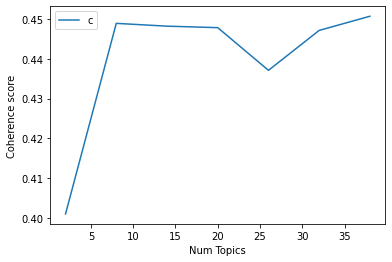

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.401
Num Topics = 8  has Coherence Value of 0.4489
Num Topics = 14  has Coherence Value of 0.4482
Num Topics = 20  has Coherence Value of 0.4478
Num Topics = 26  has Coherence Value of 0.4371
Num Topics = 32  has Coherence Value of 0.4472
Num Topics = 38  has Coherence Value of 0.4507


In [ ]:
# Select the model and print the topics
optimalmodel = model_list[3]
modeltopics = optimalmodel.show_topics(formatted=False)
pprint(optimalmodel.print_topics(num_words=10))


[(0,
  '0.155*"percent" + 0.070*"revenue" + 0.049*"quarter" + 0.046*"share" + '
  '0.034*"rise" + 0.031*"profit" + 0.029*"fall" + 0.029*"sale" + '
  '0.027*"analyst" + 0.025*"year"'),
 (1,
  '0.048*"car" + 0.032*"driver" + 0.021*"model" + 0.020*"system" + '
  '0.019*"ride" + 0.018*"drive" + 0.016*"technology" + 0.016*"vehicle" + '
  '0.016*"test" + 0.015*"city"'),
 (2,
  '0.094*"company" + 0.034*"employee" + 0.021*"leave" + 0.020*"change" + '
  '0.018*"executive" + 0.015*"team" + 0.014*"cut" + 0.014*"hire" + '
  '0.014*"work" + 0.013*"job"'),
 (3,
  '0.041*"people" + 0.028*"find" + 0.020*"snapchat" + 0.019*"time" + '
  '0.018*"news" + 0.017*"show" + 0.016*"call" + 0.015*"comment" + 0.013*"day" '
  '+ 0.012*"week"'),
 (4,
  '0.022*"government" + 0.014*"security" + 0.013*"report" + 0.013*"rule" + '
  '0.012*"issue" + 0.011*"official" + 0.011*"accord" + 0.011*"patent" + '
  '0.010*"internet" + 0.010*"regulator"'),
 (5,
  '0.074*"business" + 0.047*"software" + 0.036*"company" + 0.026*"tech

In [ ]:
# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimalmodel, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.2233,"investor, raise, company, valuation, investmen...",SoftBanks $100 Billion Tech Fund Rankles VCs a...
1,1,7.0,0.1839,"ad, video, twitter, user, search, advertising,...",Quora tests video answers to steal Q&A from Yo...
2,2,1.0,0.1739,"car, driver, model, system, ride, drive, techn...",Pittsburgh Welcomed Uber s Driverless Car Expe...
3,3,2.0,0.1295,"company, employee, leave, change, executive, t...",LeEco employees are being called to a Tuesday ...
4,4,18.0,0.1725,"company, deal, source, base, accord, firm, bus...",Why Did a Chinese Peroxide Company Pay $1 Bill...
5,5,14.0,0.2418,"user, app, mobile, people, feature, make, send...",Thanks! or Thanks. Google will tailor suggest...
6,6,9.0,0.2049,"investor, raise, company, valuation, investmen...",Softbank-Saudi tech fund becomes worlds bigges...
7,7,0.0,0.3254,"percent, revenue, quarter, share, rise, profit...",Alibaba Profit Lags Estimates on Tax as Sales ...
8,8,9.0,0.2132,"investor, raise, company, valuation, investmen...","Paytm raises $1.4 billion from SoftBank, valua..."
9,9,12.0,0.2172,"product, online, buy, store, retailer, site, s...",Walmart Reports 63% Rise in Online Sales: On T...


In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4176,"percent, revenue, quarter, share, rise, profit...","Adobe revenue, profit forecast miss estimates,..."
1,1.0,0.4618,"car, driver, model, system, ride, drive, techn...",The tech behind how Volkswagen tricked emissio...
2,2.0,0.4899,"company, employee, leave, change, executive, t...",Reddit is still in turmoil: Its been one year ...
3,3.0,0.3853,"people, find, snapchat, time, news, show, call...",Academia Pushes A New Kind of Peer Review For ...
4,4.0,0.3876,"government, security, report, rule, issue, off...",Major hacker attack on US insurance giant Anth...


In [ ]:
# Topic distribution across documents
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
dfdominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
dfdominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
dfdominant_topics


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,9.0,"investor, raise, company, valuation, investmen...",324.0,0.1155
1.0,7.0,"ad, video, twitter, user, search, advertising,...",138.0,0.0492
2.0,1.0,"car, driver, model, system, ride, drive, techn...",127.0,0.0453
3.0,2.0,"company, employee, leave, change, executive, t...",80.0,0.0285
4.0,18.0,"company, deal, source, base, accord, firm, bus...",182.0,0.0649
...,...,...,...,...
2799.0,6.0,"year, growth, company, grow, business, revenue...",NaN,NaN
2800.0,12.0,"product, online, buy, store, retailer, site, s...",NaN,NaN
2801.0,0.0,"percent, revenue, quarter, share, rise, profit...",NaN,NaN
2802.0,14.0,"user, app, mobile, people, feature, make, send...",NaN,NaN


2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python



In [ ]:
# Write your code here
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup


def getAllDoxyDonkeyPosts(url,links):
    request = urllib2.Request(url)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    for a in soup.findAll('a'):
        try:
            url = a['href']
            title = a['title']
            if title == "Older Posts":
                print(title, url)
                links.append(url)
                getAllDoxyDonkeyPosts(url,links)
        except:
            title = ""
    return

blogUrl = "https://doxydonkey.blogspot.com/"
links = []
getAllDoxyDonkeyPosts(blogUrl,links)



Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-23T19:53:00-07:00&max-results=7
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-14T19:02:00-07:00&max-results=7&start=7&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-02T19:43:00-07:00&max-results=7&start=14&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-04-17T19:26:00-07:00&max-results=7&start=21&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-04-10T18:56:00-07:00&max-results=7&start=28&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-30T19:57:00-07:00&max-results=7&start=35&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-20T19:47:00-07:00&max-results=7&start=42&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-02T17:42:00-08:00&max-results=7&start=49&by-date=false
Older Posts http

In [ ]:
def getDoxyDonkeyText(testUrl):
    request = urllib2.Request(testUrl)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    mydivs = soup.findAll("div", {"class":'post-body'})
    

    posts =[]
    for div in mydivs:
        posts+=map(lambda p:str(str(p.text).encode('ascii', errors='replace')).replace("?"," "), div.findAll("li"))
    return posts

doxyDonkeyPosts = []
for link in links:
    doxyDonkeyPosts+=getDoxyDonkeyText(link)


import nltk; 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data = doxyDonkeyPosts
data = [x[2:] for x in data]
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])



['SoftBanks $100 Billion Tech Fund Rankles VCs as Valuations Soar: In the months since Softbank Group Corp. unveiled plans for a $100 billion technology fund, the Japanese company has been making its presence deeply felt across the industry. The Vision Fund closed a few days ago with $93 billion in initial commitments, and already venture firms from London to Silicon Valley are fretting about a behemoth with the resources, clout and name recognition to snatch away the most promising deals. Just last week, SoftBank swooped in and pumped $1.4 billion into Paytm, India s largest digital-payments startup. The deal boosted Paytms valuation by about 40 percent to $7 billion. Thats not outlandish given Paytms dominant market position, but the valuations of other SoftBank deals have prompted head-scratching and ignited alarm that a funding atmosphere that only recently cooled off will heat up again. theres the concern that SoftBank will ladle out more money than startups need or can absorb. Al

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])


[['softbanks', 'billion', 'tech', 'fund', 'rankles', 'vcs', 'as', 'valuations', 'soar', 'in', 'the', 'months', 'since', 'softbank', 'group', 'corp', 'unveiled', 'plans', 'for', 'billion', 'technology', 'fund', 'the', 'japanese', 'company', 'has', 'been', 'making', 'its', 'presence', 'deeply', 'felt', 'across', 'the', 'industry', 'the', 'vision', 'fund', 'closed', 'few', 'days', 'ago', 'with', 'billion', 'in', 'initial', 'commitments', 'and', 'already', 'venture', 'firms', 'from', 'london', 'to', 'silicon', 'valley', 'are', 'fretting', 'about', 'behemoth', 'with', 'the', 'resources', 'clout', 'and', 'name', 'recognition', 'to', 'snatch', 'away', 'the', 'most', 'promising', 'deals', 'just', 'last', 'week', 'softbank', 'swooped', 'in', 'and', 'pumped', 'billion', 'into', 'paytm', 'india', 'largest', 'digital', 'payments', 'startup', 'the', 'deal', 'boosted', 'paytms', 'valuation', 'by', 'about', 'percent', 'to', 'billion', 'thats', 'not', 'outlandish', 'given', 'paytms', 'dominant', 'mark

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])



/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['softbanks', 'billion', 'tech', 'fund', 'rankles', 'vcs', 'as', 'valuations', 'soar', 'in', 'the', 'months', 'since', 'softbank', 'group', 'corp', 'unveiled', 'plans', 'for', 'billion', 'technology', 'fund', 'the', 'japanese', 'company', 'has', 'been', 'making', 'its', 'presence', 'deeply', 'felt', 'across', 'the', 'industry', 'the', 'vision', 'fund', 'closed', 'few', 'days', 'ago', 'with', 'billion', 'in', 'initial', 'commitments', 'and', 'already', 'venture', 'firms', 'from', 'london', 'to', 'silicon_valley', 'are', 'fretting', 'about', 'behemoth', 'with', 'the', 'resources', 'clout', 'and', 'name', 'recognition', 'to', 'snatch', 'away', 'the', 'most', 'promising', 'deals', 'just', 'last', 'week', 'softbank', 'swooped', 'in', 'and', 'pumped', 'billion', 'into', 'paytm', 'india', 'largest', 'digital', 'payments', 'startup', 'the', 'deal', 'boosted', 'paytms', 'valuation', 'by', 'about', 'percent', 'to', 'billion', 'thats', 'not', 'outlandish', 'given', 'paytms', 'dominant', 'market',

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['fund', 'rankle', 'valuation', 'soar', 'month', 'unveil', 'plan', 'technology', 'fund', 'japanese', 'company', 'make', 'presence', 'deeply', 'feel', 'industry', 'vision', 'fund', 'close', 'day', 'ago', 'initial', 'commitment', 'already', 'venture', 'firm', 'fret', 'resource', 'clout', 'name', 'recognition', 'snatch', 'away', 'promising', 'deal', 'last', 'week', 'softbank', 'swoop', 'pump', 'paytm', 'large', 'digital', 'payment', 'boost', 'paytms', 'valuation', 'percent', 's', 'outlandish', 'give', 'paytms', 'dominant', 'market', 'position', 'valuation', 'softbank', 'deal', 'prompt', 'head', 'scratch', 'ignited', 'alarm', 'funding', 'atmosphere', 'recently', 'cool', 'heat', 'there', 's', 'concern', 'softbank', 'ladle', 'money', 'startup', 'need', 'absorb', 'already', 'founder', 'approach', 'catch', 'desire', 'take', 'money', 'concern', 'hand', 'much', 'control', 'company', 'accord', 'investor', 'startup', 'target', 'softbank', 'try', 'negotiate', 'less', 'money', 'person', 'say', 'wil

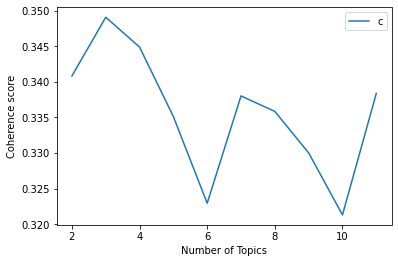

In [ ]:
# LSA code
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

dictionary = corpora.Dictionary(texts)
doctermmatrix = [dictionary.doc2bow(doc) for doc in texts]


def prepare_corpus(texts):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(texts)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doctermmatrix = [dictionary.doc2bow(doc) for doc in texts]
    # generate LDA model
    return dictionary,doctermmatrix

def create_gensim_lsa_model(texts,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(texts)
    # generate LSA model
    lsamodel = LsiModel(doctermmatrix, num_topics=20, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=20, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, texts, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def plot_graph(texts,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(texts)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,texts,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

start,stop,step=2,12,1
plot_graph(texts,start,stop,step)


In [ ]:
model=create_gensim_lsa_model(texts,6,10)
model

[(0, '0.430*"company" + 0.332*"say" + 0.242*"year" + 0.221*"percent" + 0.139*"service" + 0.137*"business" + 0.130*"revenue" + 0.126*"new" + 0.125*"make" + 0.120*"also"'), (1, '-0.446*"percent" + -0.290*"revenue" + -0.234*"year" + -0.205*"share" + 0.203*"user" + -0.190*"quarter" + 0.189*"ad" + 0.175*"use" + 0.174*"app" + 0.145*"service"'), (2, '0.466*"company" + -0.379*"ad" + -0.349*"percent" + -0.250*"user" + -0.217*"revenue" + 0.167*"investor" + -0.164*"video" + -0.157*"app" + -0.150*"mobile" + 0.133*"raise"'), (3, '-0.393*"company" + 0.387*"apple" + 0.369*"say" + -0.362*"ad" + -0.186*"user" + -0.171*"video" + 0.152*"sale" + -0.138*"twitter" + -0.130*"investor" + 0.129*"pay"'), (4, '0.703*"say" + -0.375*"apple" + -0.245*"service" + -0.191*"company" + 0.170*"ad" + -0.119*"product" + -0.115*"business" + -0.107*"new" + -0.107*"customer" + -0.101*"payment"'), (5, '-0.539*"service" + 0.457*"apple" + 0.255*"ad" + -0.254*"business" + -0.163*"revenue" + 0.141*"investor" + 0.140*"sale" + 0.134

(3) (10 points) Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb


# Write your code here
lda2vec is an extension of word2vec and LDA that jointly learns word, document, and topic vectors.
Lda2vec is obtained by modifying the skip-gram word2vec variant. In the original skip-gram method, the model is trained to predict context words based on a pivot word. In lda2vec, the pivot word vector and a document vector are added to obtain a context vector. This context vector is then used to predict context words.
I am not getting any proper resources to solve this problem.
As from few online resources LDA is better than lda2vec.



(4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing


In [ ]:
# Write your code here
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup


def getAllDoxyDonkeyPosts(url,links):
    request = urllib2.Request(url)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    for a in soup.findAll('a'):
        try:
            url = a['href']
            title = a['title']
            if title == "Older Posts":
                print(title, url)
                links.append(url)
                getAllDoxyDonkeyPosts(url,links)
        except:
            title = ""
    return

blogUrl = "https://doxydonkey.blogspot.com/"
links = []
getAllDoxyDonkeyPosts(blogUrl,links)


Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-23T19:53:00-07:00&max-results=7
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-14T19:02:00-07:00&max-results=7&start=7&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-05-02T19:43:00-07:00&max-results=7&start=14&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-04-17T19:26:00-07:00&max-results=7&start=21&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-04-10T18:56:00-07:00&max-results=7&start=28&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-30T19:57:00-07:00&max-results=7&start=35&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-20T19:47:00-07:00&max-results=7&start=42&by-date=false
Older Posts https://doxydonkey.blogspot.com/search?updated-max=2017-03-02T17:42:00-08:00&max-results=7&start=49&by-date=false
Older Posts http

In [ ]:
def getDoxyDonkeyText(testUrl):
    request = urllib2.Request(testUrl)
    response = urllib2.urlopen(request)
    soup = BeautifulSoup(response)
    mydivs = soup.findAll("div", {"class":'post-body'})
    

    posts =[]
    for div in mydivs:
        posts+=map(lambda p:str(str(p.text).encode('ascii', errors='replace')).replace("?"," "), div.findAll("li"))
    return posts

doxyDonkeyPosts = []
for link in links:
    doxyDonkeyPosts+=getDoxyDonkeyText(link)


import nltk; 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
data = doxyDonkeyPosts
data = [x[2:] for x in data]
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])


['SoftBanks $100 Billion Tech Fund Rankles VCs as Valuations Soar: In the months since Softbank Group Corp. unveiled plans for a $100 billion technology fund, the Japanese company has been making its presence deeply felt across the industry. The Vision Fund closed a few days ago with $93 billion in initial commitments, and already venture firms from London to Silicon Valley are fretting about a behemoth with the resources, clout and name recognition to snatch away the most promising deals. Just last week, SoftBank swooped in and pumped $1.4 billion into Paytm, India s largest digital-payments startup. The deal boosted Paytms valuation by about 40 percent to $7 billion. Thats not outlandish given Paytms dominant market position, but the valuations of other SoftBank deals have prompted head-scratching and ignited alarm that a funding atmosphere that only recently cooled off will heat up again. theres the concern that SoftBank will ladle out more money than startups need or can absorb. Al

In [35]:
#BERTopic code
!pip install bertopic

from bertopic import BERTopic
model = BERTopic(verbose=True)
df1=data[0:500]
doc = df1
topics, probabilities = model.fit_transform(doc)
model.get_topic_freq().head(11)


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2022-04-05 02:57:41,616 - BERTopic - Transformed documents to Embeddings
2022-04-05 02:57:47,550 - BERTopic - Reduced dimensionality with UMAP
2022-04-05 02:57:47,594 - BERTopic - Clustered UMAP embeddings with HDBSCAN


,Topic,Count
0,-1,120
1,0,48
2,1,44
3,2,40
4,3,36
5,4,34
6,5,30
7,6,26
8,7,24
9,8,20


(5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.
# Write your answer here (no code needed for this question)

From LDA we got coherence score 0.47 and from LSA we got coherence score 0.35 .
Bertopic model will took more time to train the data and it is suitable only when we have small set of texts or corpus. Here this dataset contains larger set  of data and it requires more time to process.
Hence we conclude that LDA algorithm is better and it has high coherence score 0.47.

